In [1]:
import math
import numpy as np
from numba import cuda
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
len(cuda.gpus)
cuda.gpus[0].name


b'GeForce RTX 2070 SUPER'

In [5]:
@cuda.jit
def mandelbrot_numba(m, iterations):
    # Matrix index.
    i, j = cuda.grid(2)
    size = m.shape[0]
    # Skip threads outside the matrix.
    if i >= size or j >= size:
        return
    # Run the simulation.
    c = (-2 + 3. / size * j +
         1j * (1.5 - 3. / size * i))
    z = 0
    for n in range(iterations):
        if abs(z) <= 10:
            z = z * z + c
            m[i, j] = n
        else:
            break

In [17]:
size = 400
iterations = 100
m = np.zeros((size, size))

In [18]:
# 16x16 threads per block.
bs = 16
# Number of blocks in the grid.
bpg = math.ceil(size / bs)
# We prepare the GPU function.
f = mandelbrot_numba[(bpg, bpg), (bs, bs)]


In [19]:
f(m, iterations)


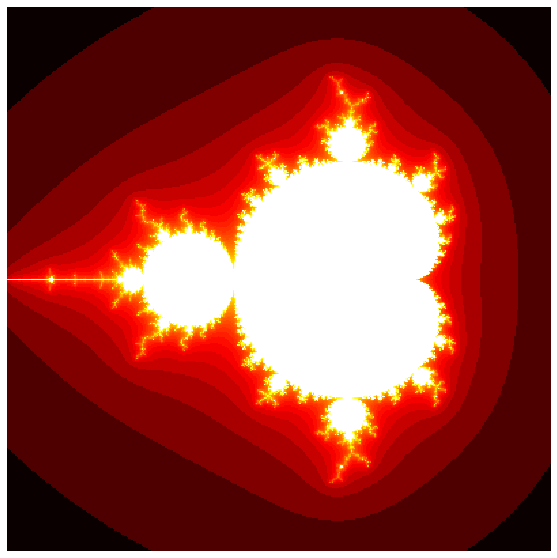

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(np.log(m), cmap=plt.cm.hot)
ax.set_axis_off()

## Benchmark 

In [21]:
%timeit -n10 -r100 f(m, iterations)



1.78 ms ± 106 µs per loop (mean ± std. dev. of 100 runs, 10 loops each)
